Introduction:
In this project I am going to analyze the IMDB database thoroughly. This is done to check for correlations between features in movies. Certain questions are going to answered using graphs. Such as, 
1: Figuiring out which movies obtained the highest ratings and who are their subsequent authors.
2: Finding out if rating affects the revenue obtained from the movie.
3: Which genre has the best average popularity.
4: which years had the highest revenue generated from the movie industry.
For these questions to be answered, first we must clean the data in many steps.
1: drop unneccessary columns as they take up space and runtime.
2: remove duplicates as they may change results.
3: remove missing values as they may ruin the results.
4: rename columns to more meaningfull names.

In [1]:
import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("tmdb-movies.csv")
print(df.head(5))
print(df.describe())
df.info()


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# check for amount of duplicates
print(df.duplicated().sum())
# remoove the duplicates
df.drop_duplicates(inplace = True)
# check for amount of duplicates
df.duplicated().sum()

1


0

The cell above checked for the number of duplicates in the database then removed them as they would give skewed results if kept in place.

In [4]:
#remove not needed columns 
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'budget', 'revenue'], axis = 1, inplace = True)

Removed unnecessary columns as they take space and runtime without any benefits

In [5]:
#rename adjusted budget and adjusted revenute to just budget and revenue

df.rename(columns={"budget_adj": "budget", "revenue_adj": "revenue"},inplace=True)
df.head(5)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Renamed the budget and revenue columns to make more sense

In [6]:
# check for amount of empty fields
df.isnull().sum()
# drop rows with empty production company and director and genres
# as they will be used in comparisions
df.dropna(subset=['production_companies', 'genres', 'director', 'cast'], inplace=True)
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget                  0
revenue                 0
dtype: int64

Dropped empty fields as they may produce faulty results

In [7]:
#function that adds title to the graph
def PlotTitle (name):
    return plt.title(name)

The function above takes in a name and returns it as a graph title

In [8]:
#code to get the top 5 genres 
top_5=df.groupby(["genres"])[['id']].count().sort_values(by=['id'],ascending = False)[0:5]
top5_df =df[df['genres'].isin(top_5.index.values.tolist())]

,mean,std
genres,,
Comedy,1.244585e+07,2.054665e+07
Comedy|Drama,9.637177e+06,1.829877e+07
Comedy|Romance,1.630096e+07,2.386039e+07
Drama,1.113141e+07,2.065801e+07
Drama|Romance,1.226926e+07,1.914361e+07


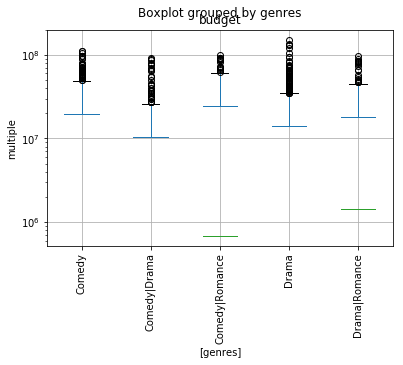

In [9]:
#boxplot showing the mean and standard deviation of the top 5 genres
top5_df.boxplot(column=['budget'],by = ['genres'], rot=90).set_yscale('log')
plt.ylabel("multiple")
pd.DataFrame(top5_df.groupby(['genres'])['budget'].describe().loc[:,['mean','std']])

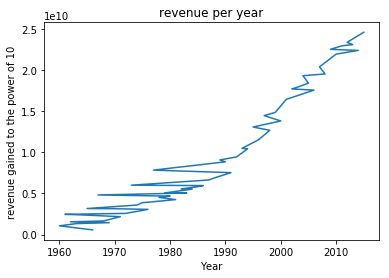

In [10]:
#graph of highest sum of revenue per year
plt.plot(df.groupby('release_year')['revenue'].sum().sort_values())
PlotTitle("revenue per year")
plt.rcParams["figure.figsize"] = (2,2)
plt.xlabel("Year")
plt.ylabel("revenue gained to the power of 10")
plt.show()

The Visual above shows that the movie industry as a whole is receiving higher revenue as time passes which is to be expected as the industry is booming and gaining more followers.

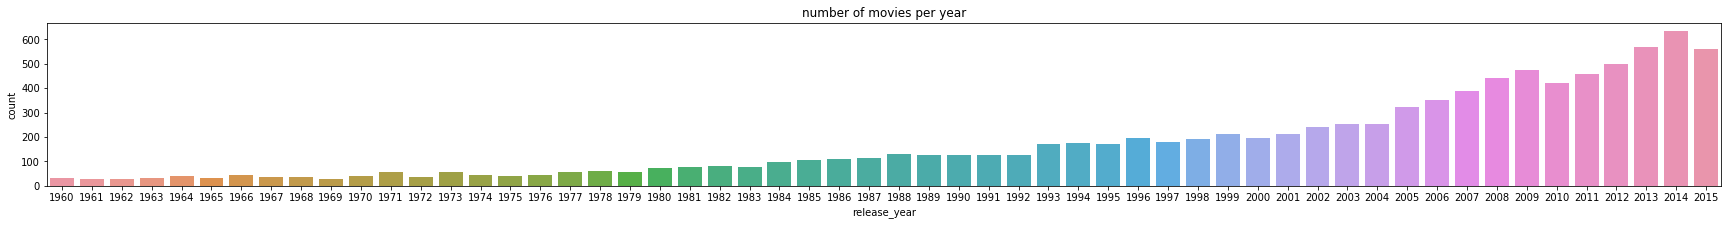

In [16]:
#graph showing number of movies in the database per year
df['release_year'].value_counts()
sns.countplot(x='release_year',data=df)
PlotTitle('number of movies per year')
plt.rcParams["figure.figsize"] = (30,1)

plt.show()
#this shows a positive correlation which means more movies are being produced as time moves on

The Visual above shows that the movie industry as a whole is producing more movies as time passes which is to be expected as the industry is booming and gaining more followers.

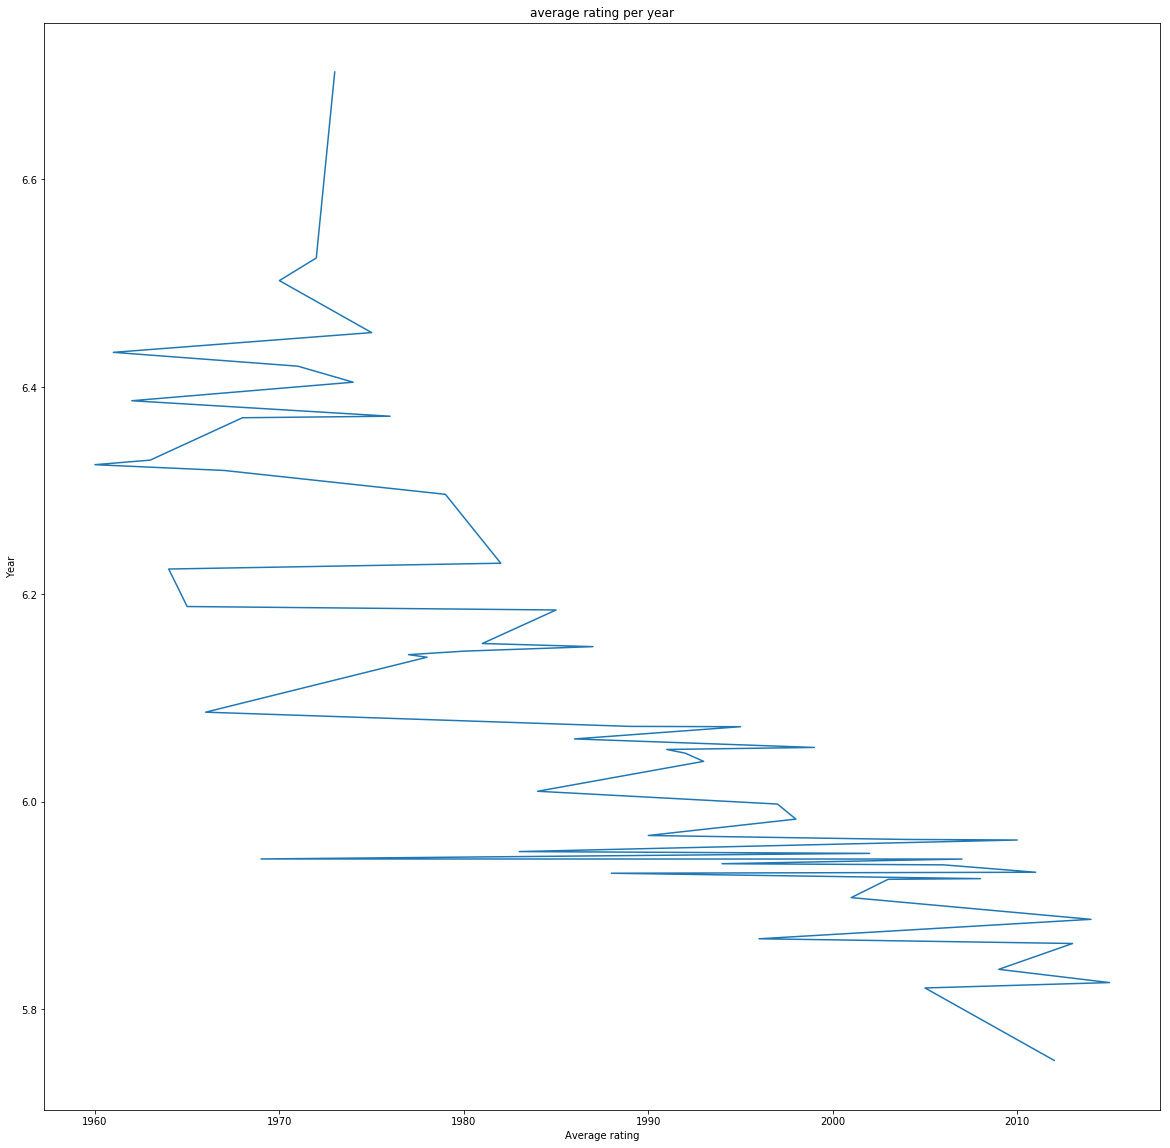

In [19]:
#graph of highest average rating per year
plt.plot(df.groupby('release_year')['vote_average'].mean().sort_values())
plt.title("average rating per year")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Average rating")
plt.ylabel("Year")
plt.show()
#this shows that there is a negative correlation between release year and average rating

The Visual above shows that the movie industry as a whole is receiving lower ratings as time passes which is to be expected as the number of movies is increasing by time. This makes the industry subjected to higher standards as people always look for movies better than the ones they already saw.

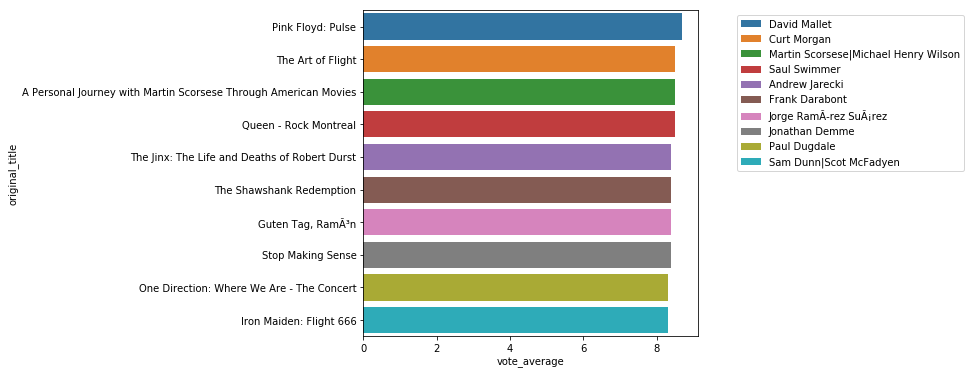

In [20]:
#show top 10 best movies by rating and showing the director
#first we get the top 10 movies and their directors using a legend
top10_rating = df.nlargest(10,'vote_average')[['original_title','director','vote_average']].set_index('original_title')
#then we plot the bar plot
plt.rcParams["figure.figsize"] = (6,6)
sns.barplot(x='vote_average', y=top10_rating.index, data = top10_rating, hue='director', dodge = False)
# put the legend outside the bar plot viewing area
plt.legend(bbox_to_anchor=(1.1,1), loc =2)
plt.show()

The visual above shows the masterpieces that recieved the highest average rating and their respective directors

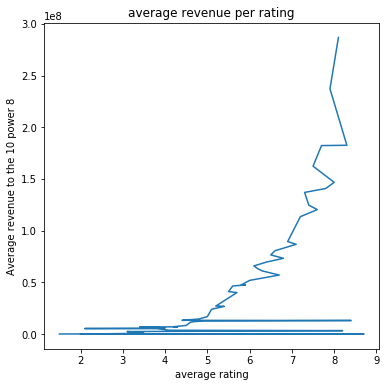

In [21]:
#show if rating affects the revenue of movies
plt.plot(df.groupby('vote_average')['revenue'].mean().sort_values())
plt.title("average revenue per rating")
plt.xlabel("average rating")
plt.ylabel("Average revenue to the 10 power 8")
plt.show()
#this shows that there is a positive correlation between movie rating and revenue

The above visual shows that the higher the movie rating the higher the revenue it recieves, which is to be expected since people tend to watch movies they like more than the ones they don't like.

In [22]:
# now i want to split each to movie to represent all it's genres
# start by getting all the genre names in the database
# first we make all the genres in 1 big 2d list 
list1= []
for value in df['genres']:
    list1.append(value.split('|'))

In [23]:
# now we convert the 2d list to 1d list
list2 = []
for item in list1:
    for item1 in item:
        list2.append(item1)
      

In [24]:
# now we check for the unique values in this 1d list
list3 = []
for item in list2:
    if item not in list3:
        list3.append(item)
# now list3 contains all the genres present in the database       

In [25]:
dummies = df['genres'].str.get_dummies(sep='|')
final = pd.concat([df, dummies], axis=1)

In the above code we disect the genres column of the database to represent all the different genres that 1 movie has.

In [15]:
final

,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,...,0,0,0,0,0,0,0,1,0,0
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,...,0,0,0,0,0,0,0,1,0,1
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,...,0,0,0,0,0,1,0,1,0,0
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,...,0,0,0,0,0,1,0,0,0,0
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,...,0,0,0,0,0,0,0,0,0,0
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# create a fourth list to get the mean popularity of each genre
# max =0
list4 =[]
for genre in list3:
    # if max < final.groupby(genre).mean().popularity[1]:
    list4.append(final.groupby(genre).mean().popularity[1])
    
list4
        

[0.96825624832214652,
 1.2090527716763004,
 1.0652779612676062,
 0.7721724111434799,
 1.0563103964285701,
 0.76733713163972239,
 0.60455421249999997,
 0.62587838107241045,
 0.8464670968036534,
 0.91428143111831439,
 0.63156494494611048,
 0.71359635575679137,
 0.62717816305732454,
 0.75277702713178318,
 0.60949957516339925,
 0.55088423303834777,
 0.48020679357798113,
 0.217167283911672,
 0.29586351515151516,
 0.20938414166666661]

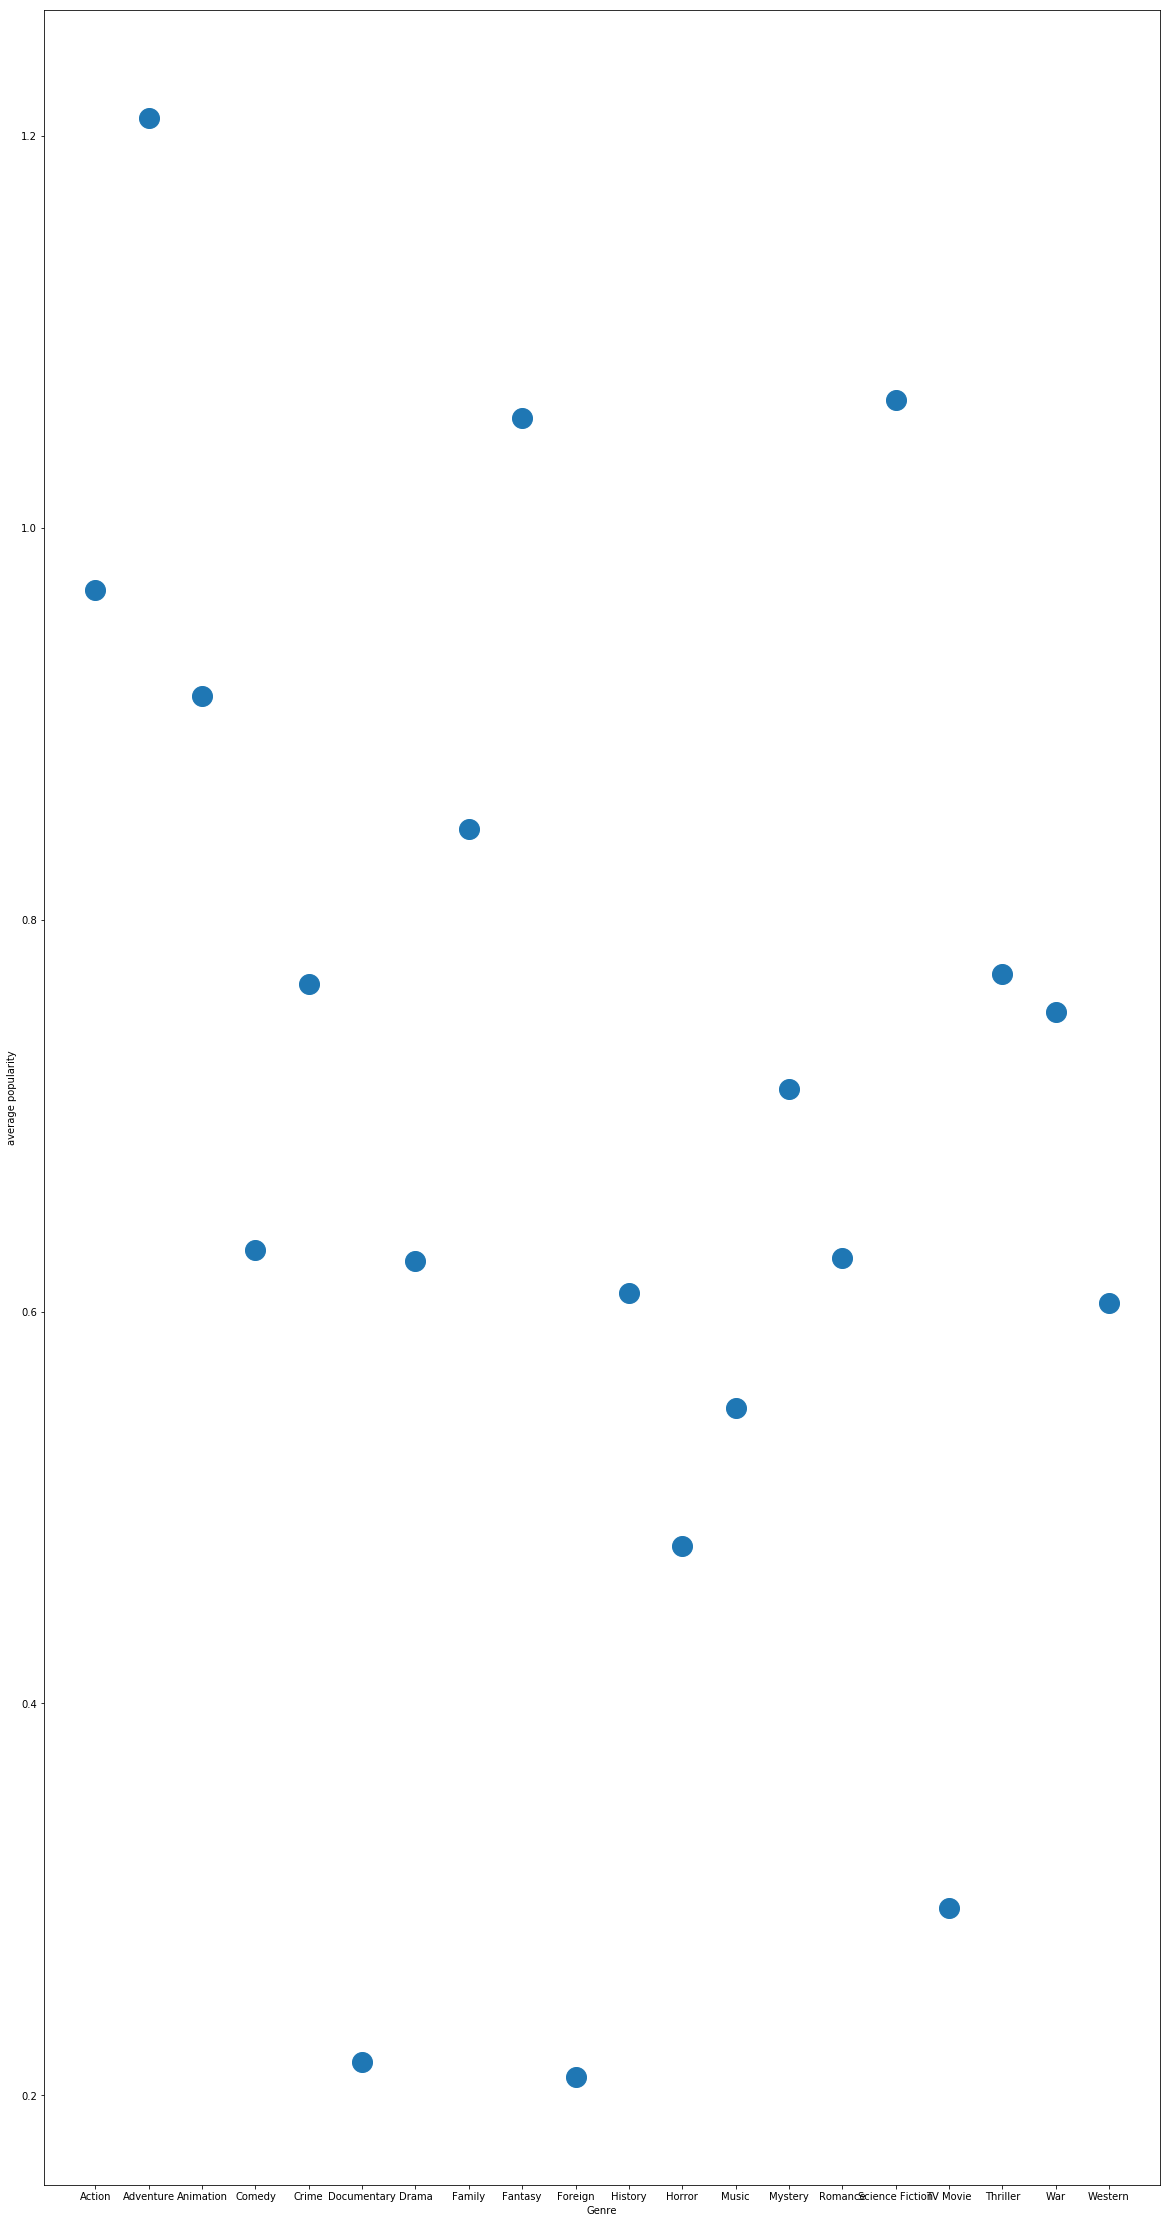

In [28]:
#create a barplot showing the average popularity of each genre across all years
# plt.title('average popularity of each genre across all years')
plt.scatter(list3, list4,s=400)
# increase figure size
plt.rcParams["figure.figsize"] = (20,20)
plt.xlabel("Genre")
plt.ylabel("average popularity")
plt.show()

In [29]:
df.shape

(9772, 15)

CONCLUSION:
In this project I have taken the IMDB database and researched it to find out multiple intresting outcomes such as:
1: Movie rating positively correlates with the revenue it gains
2: Adventure movies have the highest popularity across all genres
3: David Mallet was the director of the highest rated film in this database "Pink Floyd: Pulse"
4: Average film rating peaked in the 1970's and has since decreased showing a negative correllation with time
5: number of movies released per year is increasing with time, the peak is in 2015.
These results are made from a sample of 9772 movies which is quite a large sample to use when researching this industry.
Limitations:
This database is lacking to show which casts had leading roles and which had minor roles. This information could have been used to further investigate the cast resposibility for movie ratings and revenue and much more.
The missing data wasn't too much to handle
Missing data might have interfered with the top rated movies graph as one of the highest rated movies might have been removed
The data was suffiecent to prove my findings
Seperating different types of genres for each movie needed considerably more time than other things as all the movie's genres where placed in a single column
